# 1. Loading the data

Here we assume that we already have the errors stored as numpy array for all the three schemes considered. Note that the dataset used here are simulated assuming ideal situation (no noise, sufficiently dense data points at regular interval).

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

with open('errors_T1_h01.pkl', 'rb') as file:
    errors01 = pickle.load(file)

with open('errors_T1_h008.pkl', 'rb') as file:
    errors008 = pickle.load(file)
    
with open('errors_T1_h005.pkl', 'rb') as file:
    errors005 = pickle.load(file)

with open('errors_T1_h004.pkl', 'rb') as file:
    errors004 = pickle.load(file)
    
with open('errors_T1_h002.pkl', 'rb') as file:
    errors002 = pickle.load(file)

#grid_points = np.arange(0, 1, 0.01)
grid_sizes = [100, 125, 200, 250, 500]
step_sizes = [1/x for x in grid_sizes]
print(step_sizes)

[0.01, 0.008, 0.005, 0.004, 0.002]


In [30]:
def l1_norm(x):
    """
    return the normalized L1-norm of x
    """
    return np.sum(x)/len(x)

In [40]:
print(l1_norm([1, 2]))
print(l1_norm([1, 2, 1]))

1.5
1.3333333333333333


# 2. Plotting the data

Here we would like to summarize the numerical results to analyze the convergence properties of the three LMM schemes for learning dynamics from data. Reminder: theory suggests that
1. Adams Bashforths is stable for $ 1 \leq M \leq 6 $.
2. Adams Moulton is stable for $ M = 1$
3. BDF is stable for all M.

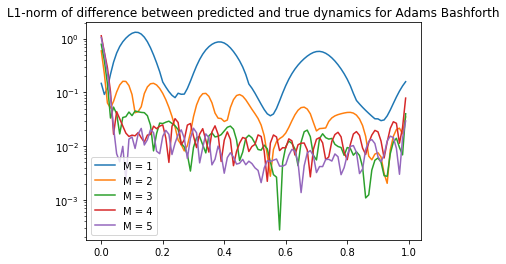

In [3]:
# plot the L1-norm at the grid points

scheme = 'Adams Bashforth'
plt.title('L1-norm of difference between predicted and true dynamics for ' + scheme)

plt.yscale('log')
grid_points = np.arange(0, 1, 0.01)
plt.plot(grid_points, errors01['AB1'], label='M = 1')
plt.plot(grid_points, errors01['AB2'], label='M = 2')
plt.plot(grid_points, errors01['AB3'], label='M = 3')
plt.plot(grid_points, errors01['AB4'], label='M = 4')
plt.plot(grid_points, errors01['AB5'], label='M = 5')
plt.legend()

In [7]:
# make sure the errors are all above zero
# since we use L1-norm

for errors in [errors01, errors008, errors005, errors004, errors002]:
    for key in errors:
        assert errors[key] > [0 for x in errors[key]]

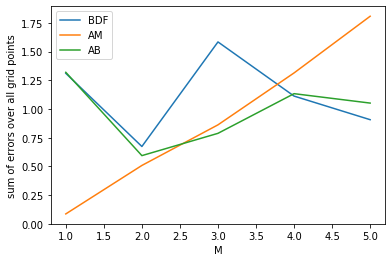

In [15]:
# make sure all errors are greater than zero
# here we use L_inf-norm as in the paper

bdf = [np.max(errors01['BDF' + str(i)]) for i in range(1, 6)]
ab = [np.max(errors01['AB' + str(i)]) for i in range(1, 6)]
am = [np.max(errors01['AM' + str(i)]) for i in range(1, 6)]

plt.plot(range(1, 6), bdf, label='BDF')
plt.plot(range(1, 6), am, label='AM')
plt.plot(range(1, 6), ab, label='AB')
plt.xlabel('M')
plt.ylabel('sum of errors over all grid points')
plt.legend()

In [29]:
print([len(errors01['BDF' + str(i)]) for i in range(1, 6)])
print([len(errors008['BDF' + str(i)]) for i in range(1, 6)])
print([len(errors005['BDF' + str(i)]) for i in range(1, 6)])
print([len(errors004['BDF' + str(i)]) for i in range(1, 6)])
print([len(errors002['BDF' + str(i)]) for i in range(1, 6)])

[100, 100, 100, 100, 100]
[125, 125, 125, 125, 125]
[200, 200, 200, 200, 200]
[250, 250, 250, 250, 250]
[500, 500, 500, 500, 500]


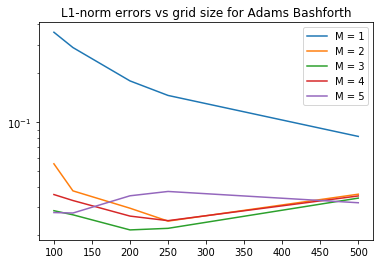

In [33]:
# plot errors against grid size
# do not use L1-norm: doesn't make sense because higher grid points -> more summations -> higher errors
# using L1-norm will confound the effects of the instability if any

scheme = 'Adams Bashforth'
plt.title('L1-norm errors vs grid size for ' + scheme)
ab1 = [l1_norm(errors01['AB1']), l1_norm(errors008['AB1']), l1_norm(errors005['AB1']), l1_norm(errors004['AB1']), l1_norm(errors002['AB1'])]
ab2 = [l1_norm(errors01['AB2']), l1_norm(errors008['AB2']), l1_norm(errors005['AB2']), l1_norm(errors004['AB2']), l1_norm(errors002['AB2'])]
ab3 = [l1_norm(errors01['AB3']), l1_norm(errors008['AB3']), l1_norm(errors005['AB3']), l1_norm(errors004['AB3']), l1_norm(errors002['AB3'])]
ab4 = [l1_norm(errors01['AB4']), l1_norm(errors008['AB4']), l1_norm(errors005['AB4']), l1_norm(errors004['AB4']), l1_norm(errors002['AB4'])]
ab5 = [l1_norm(errors01['AB5']), l1_norm(errors008['AB5']), l1_norm(errors005['AB5']), l1_norm(errors004['AB5']), l1_norm(errors002['AB5'])]

plt.plot(grid_sizes, ab1, label='M = 1')
plt.plot(grid_sizes, ab2, label='M = 2')
plt.plot(grid_sizes, ab3, label='M = 3')
plt.plot(grid_sizes, ab4, label='M = 4')
plt.plot(grid_sizes, ab5, label='M = 5')
plt.yscale('log')
plt.legend()

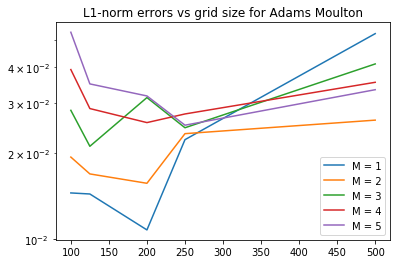

In [34]:
# plot errors against grid size
# do not use L1-norm: doesn't make sense because higher grid points -> more summations -> higher errors
# using L1-norm will confound the effects of the instability if any

scheme = 'Adams Moulton'
plt.title('L1-norm errors vs grid size for ' + scheme)
am1 = [l1_norm(errors01['AM1']), l1_norm(errors008['AM1']), l1_norm(errors005['AM1']), l1_norm(errors004['AM1']), l1_norm(errors002['AM1'])]
am2 = [l1_norm(errors01['AM2']), l1_norm(errors008['AM2']), l1_norm(errors005['AM2']), l1_norm(errors004['AM2']), l1_norm(errors002['AM2'])]
am3 = [l1_norm(errors01['AM3']), l1_norm(errors008['AM3']), l1_norm(errors005['AM3']), l1_norm(errors004['AM3']), l1_norm(errors002['AM3'])]
am4 = [l1_norm(errors01['AM4']), l1_norm(errors008['AM4']), l1_norm(errors005['AM4']), l1_norm(errors004['AM4']), l1_norm(errors002['AM4'])]
am5 = [l1_norm(errors01['AM5']), l1_norm(errors008['AM5']), l1_norm(errors005['AM5']), l1_norm(errors004['AM5']), l1_norm(errors002['AM5'])]

plt.plot(grid_sizes, am1, label='M = 1')
plt.plot(grid_sizes, am2, label='M = 2')
plt.plot(grid_sizes, am3, label='M = 3')
plt.plot(grid_sizes, am4, label='M = 4')
plt.plot(grid_sizes, am5, label='M = 5')
plt.yscale('log')
plt.legend()

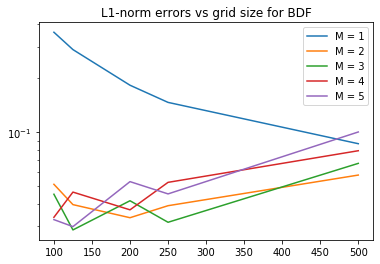

In [36]:
# plot errors against grid size
# do not use L1-norm: doesn't make sense because higher grid points -> more summations -> higher errors
# using L1-norm will confound the effects of the instability if any

scheme = 'BDF'
plt.title('L1-norm errors vs grid size for ' + scheme)
bdf1 = [l1_norm(errors01['BDF1']), l1_norm(errors008['BDF1']), l1_norm(errors005['BDF1']), l1_norm(errors004['BDF1']), l1_norm(errors002['BDF1'])]
bdf2 = [l1_norm(errors01['BDF2']), l1_norm(errors008['BDF2']), l1_norm(errors005['BDF2']), l1_norm(errors004['BDF2']), l1_norm(errors002['BDF2'])]
bdf3 = [l1_norm(errors01['BDF3']), l1_norm(errors008['BDF3']), l1_norm(errors005['BDF3']), l1_norm(errors004['BDF3']), l1_norm(errors002['BDF3'])]
bdf4 = [l1_norm(errors01['BDF4']), l1_norm(errors008['BDF4']), l1_norm(errors005['BDF4']), l1_norm(errors004['BDF4']), l1_norm(errors002['BDF4'])]
bdf5 = [l1_norm(errors01['BDF5']), l1_norm(errors008['BDF5']), l1_norm(errors005['BDF5']), l1_norm(errors004['BDF5']), l1_norm(errors002['BDF5'])]

plt.plot(grid_sizes, bdf1, label='M = 1')
plt.plot(grid_sizes, bdf2, label='M = 2')
plt.plot(grid_sizes, bdf3, label='M = 3')
plt.plot(grid_sizes, bdf4, label='M = 4')
plt.plot(grid_sizes, bdf5, label='M = 5')
plt.yscale('log')
plt.legend()

Note that in the paper, they only considered grid size up to 250.

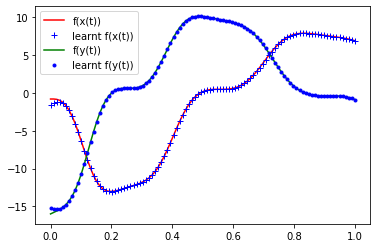

In [56]:
with open('errors_AB5.pkl', 'rb') as file:
    ab5 = pickle.load(file)

err = ab5['e']
f_true = np.array(ab5['f'])
f_pred = np.array(ab5['ml_f'])

plt.plot(np.linspace(0, 1, len(err)), f_true[:, 0], 'r-', label='f(x(t))')
plt.plot(np.linspace(0, 1, len(err)), f_pred[:, 0], 'b+', label='learnt f(x(t))')
plt.plot(np.linspace(0, 1, len(err)), f_true[:, 1], 'g-', label='f(y(t))')
plt.plot(np.linspace(0, 1, len(err)), f_pred[:, 1], 'b.', label='learnt f(y(t))')
plt.legend()

In [57]:
f_true[:5]

array([[ -0.8       , -16.        ],
       [ -0.79851715, -15.80901879],
       [ -0.84401025, -15.61289418],
       [ -0.97946865, -15.39342208],
       [ -1.24303508, -15.12383236]])

In [58]:
f_pred[:5]

array([[ -1.5388434, -15.157755 ],
       [ -1.3914157, -15.332923 ],
       [ -1.2334987, -15.389262 ],
       [ -1.1778959, -15.320249 ],
       [ -1.3102598, -15.119456 ]], dtype=float32)

# 4. Recontruction of long-time dynamics

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

time_points = np.arange(0,25,0.01)
with open('test_pred.npy', 'rb') as file:
    test_pred = np.load(file)

def f(x,t):
    """
    Return the derivatives (RHS of the ODE)
    This is a linear system with the form f = A x
    Args:
    x -- a 2 x 1 vector of measurements
    """
    A = np.array([[-0.1, 2], [-2,-0.1]]) # 2 x 2

    return np.ravel(np.matmul(A,x.reshape(-1, 1)**3))

# create time points
time_points = np.arange(0,25,0.01)

# specify initial conditions
x0 = np.array([2,0])

simulated_x = odeint(f, x0, time_points)

Text(0.5, 1.0, 'Trajectories of 2D Cubic Harmonic Oscillator')

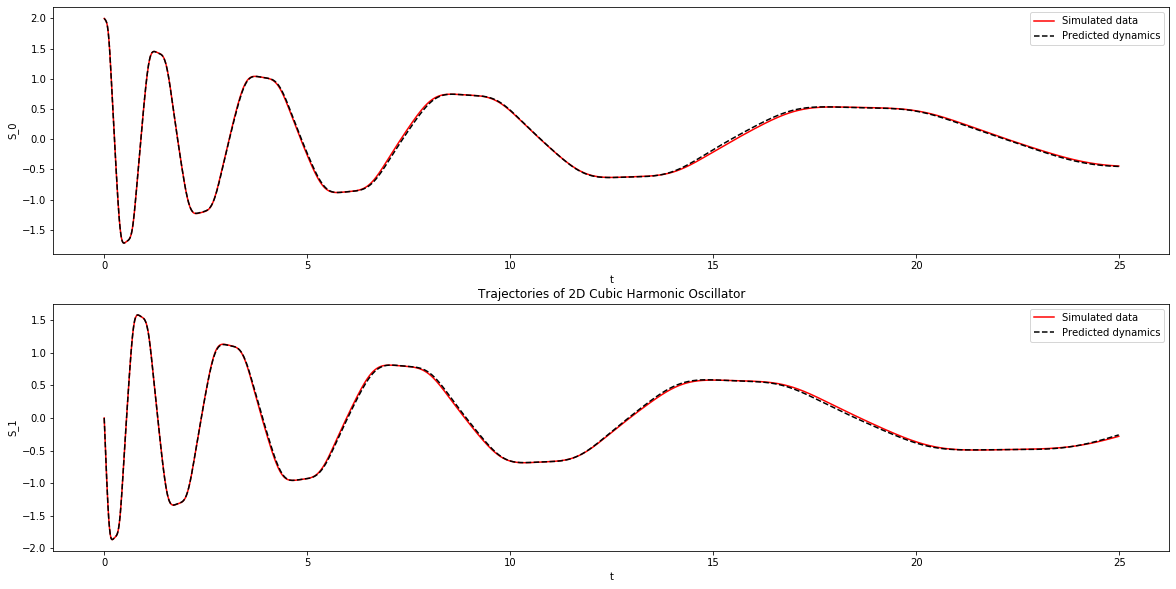

In [3]:

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, simulated_x[:, species], 'r-', label='Simulated data')
    plt.plot(time_points, test_pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
plt.title('Trajectories of 2D Cubic Harmonic Oscillator')

Text(0.5, 1.0, 'Phase plane of 2D Cubic Harmonic Oscillator')

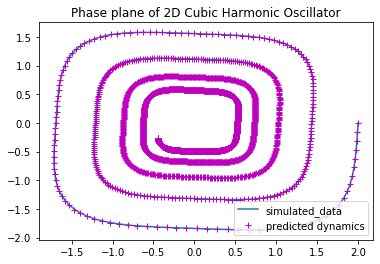

In [4]:
# Phase plane

plt.plot(simulated_x[:,0], simulated_x[:,1], label='simulated_data')
plt.legend()
plt.plot(test_pred[:,0], test_pred[:,1], 'm+', label='predicted dynamics')
plt.legend()
plt.title('Phase plane of 2D Cubic Harmonic Oscillator')